In [1]:
# What version of Python do you have?
import sys
import os
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import re
import mne
import pathlib
import openpyxl
from datetime import datetime
import pytz
import random
import os
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Sequential
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix
from PIL import Image
%matplotlib inline

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.6.0
Keras Version: 2.6.0

Python 3.7.11 (default, Jul 27 2021, 09:42:29) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.3
Scikit-Learn 0.24.2
GPU is available


In [5]:
os.getcwd()
external_hardisk_data_path = os.path.abspath(os.sep) + "E:\Database"

train_path = "../../../psd_dual_channel_10_patient/w"

test_path = "../../../psd_dual_channel_10_patient/w/test"

FREQ = 246

resnet152_input_shape = (224, 224)

inceptionV3_input_shape = (299, 299)

batch_size = 1

In [3]:
ictal = pd.read_csv("../../../chbmit_ictal_23channels_data.csv"

In [44]:
prei = pd.read_csv("../../../chbmit_preictal_23channels_data.csv")

In [4]:
single_ch_ictal = ictal['C3-P3']

In [45]:
single_ch_prei = prei['C3-P3']

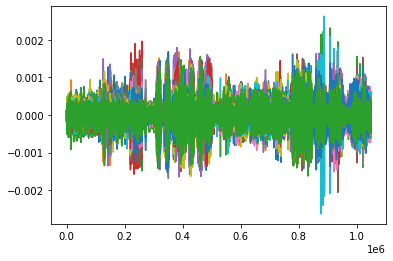

In [7]:
plt.plot(ictal)

In [9]:
def get_max_window_iteration(dataframe, buffer=4):
    len_of_df = int(len(dataframe) / (buffer*256))
    return len_of_df

In [11]:
def get_window(start_index, data, size = 4, overlap = 0, is_sezure = False, frequency = 256):
    if(is_sezure):
        overlap = 2
    else:
        overlap = overlap
    
    start = start_index * (size - overlap) * frequency
    end = start + (size * frequency)
    
    return [data[start:end].tolist()]

In [12]:
ictal_win = [get_window(start_index=i, data=single_ch_ictal) for i in range(get_max_window_iteration(single_ch_ictal, 4))]

In [46]:
prei_win = [get_window(start_index=i, data=single_ch_prei) for i in range(get_max_window_iteration(single_ch_prei, 4))]

In [41]:
def spec_transform_save_to_folder(index, win, channel, patient_state, patient="all", plot_title = False):
    plt.figure(figsize=(7,7))
    series = win[0]
    try:
        series = np.array(series).astype(np.float)
    except Exception as e:
        print(f"error: {e}")
        print(f"patient_state: {patient_state} channel: {channel} index: {index} window: {series}")
    denoised_series = denoise_wavelet(series, method='BayesShrink',wavelet='db6', mode='soft',rescale_sigma=True, multichannel=False, wavelet_levels=3)
   

    plt.specgram(denoised_series,Fs=FREQ,cmap='jet')
    
    if patient_state == "seizure":
        plt.savefig(f'../../../cleaned/seizure/{patient}_{index}_{channel}.png')
    elif patient_state == "preictal":
        plt.savefig(f'../../../cleaned/preictal/{patient}_{index}_{channel}.png')
    
    del series
    plt.clf()    
    plt.close()

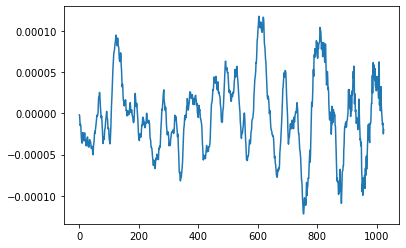

In [35]:
plt.plot(list(ictal_win[1][0]))

C:\Users\thoma\anaconda3\envs\AI_keras_env_GPU\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=1024).
  """Entry point for launching an IPython kernel.


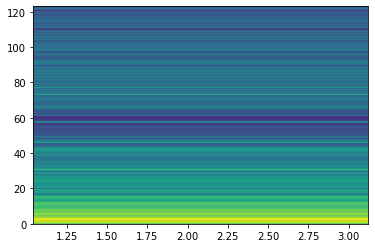

In [37]:
spectrum, freqs, t, im = plt.specgram(ictal_win[1][0], NFFT = 1024, noverlap = 512, Fs = FREQ)

plt.show()

In [47]:
for i, o in enumerate(prei_win):
    spec_transform_save_to_folder(win=o, index=i, channel="C3-P3", patient_state = "preictal")